In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace = True,
    header=1
)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(85), object(26)
memory usage: 356.6+ MB


In [5]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [6]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [7]:
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

In [8]:

y2015.drop(['url', 'emp_title', 'zip_code' ,'earliest_cr_line', 'revol_util', 'sub_grade', 'addr_state', 'desc', 'id', 'member_id', 'last_pymnt_d', 'last_credit_pull_d', 'acc_now_delinq', 'issue_d', 'title'], 1, inplace=True)

In [9]:
y2015.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,RENT,100000.0,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
y2015 = y2015[:-2]

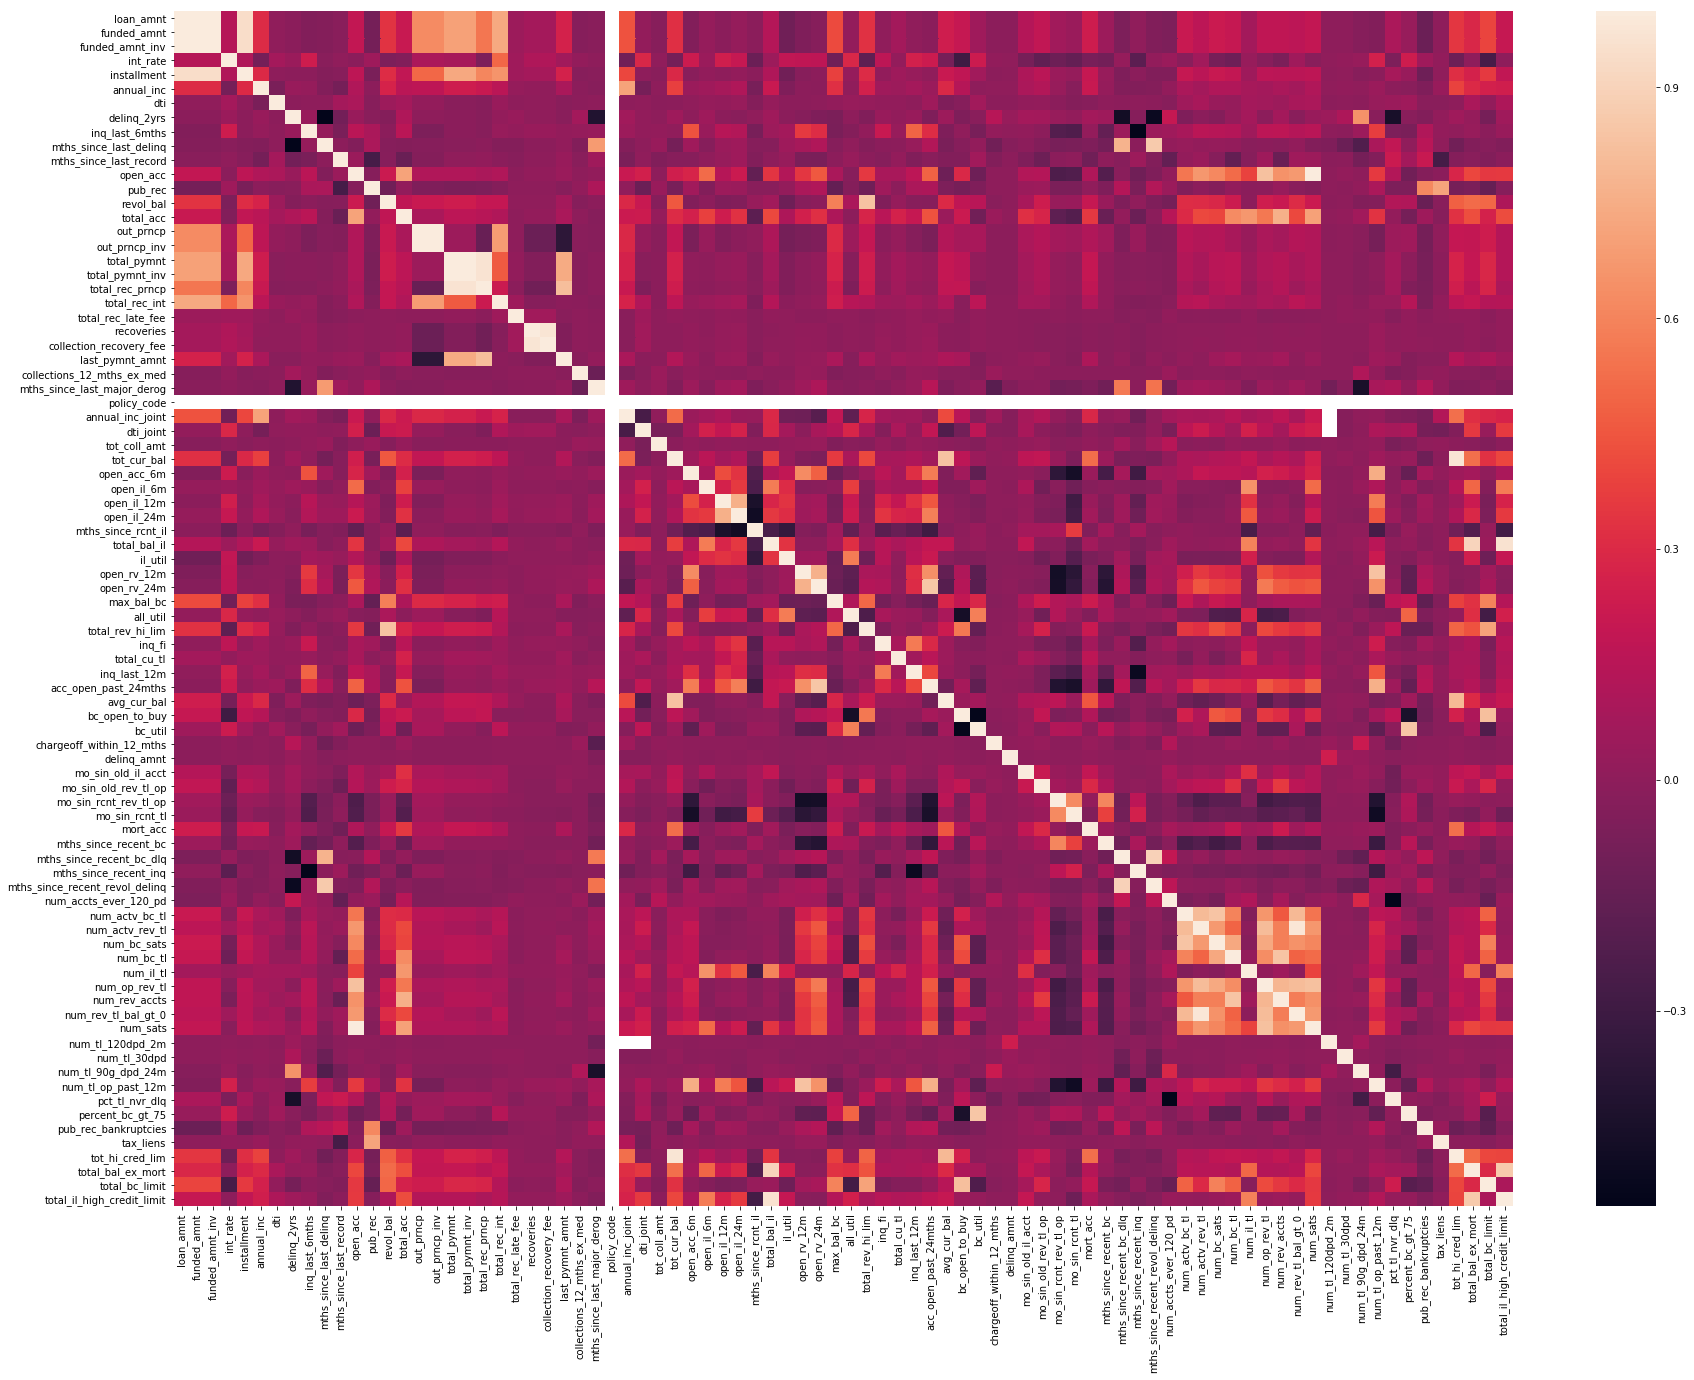

In [11]:
import seaborn as sns
plt.figure(figsize=(30,22))
sns.heatmap(y2015.corr())

Here we have a heatmap of the remaining features before getting dummies or attempting PCA. Still too many features at this point. But we can see that some of these features are highly postively correlated with other features and can done away with, such as:

- funded_amnt
- funded_amnt_inv
- installment
- total_acc
- out_prncp
- out_prncp_inv
- total_rec_int
- total_pymnt
- total_pymnt_inv
- total_rev_hi_lim
- mths_since_recent_bc_diq
- mths_since_recent_revol_delinq
- num_actv_rev_tl
- num_bc_sats
- num_sats
- num_op_rev_tl
- AND SEVERAL MORE!!

Features like policy_code offer no value as they have no usable data. The negative correlations seem to stop aroun 0.5. I think we can leave those in. Let's eliminate these features and recheck the correlations. 

In [12]:
y2015.drop(['mths_since_last_major_derog', 'total_il_high_credit_limit', 'percent_bc_gt_75', 'num_tl_op_past_12m', 'open_acc', 'pub_rec', 'funded_amnt','funded_amnt_inv','installment','total_acc','out_prncp','out_prncp_inv','total_rec_int','total_pymnt','total_pymnt_inv','total_rev_hi_lim','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','num_actv_rev_tl','num_bc_sats','num_sats','num_op_rev_tl', 'policy_code'], 1, inplace=True)

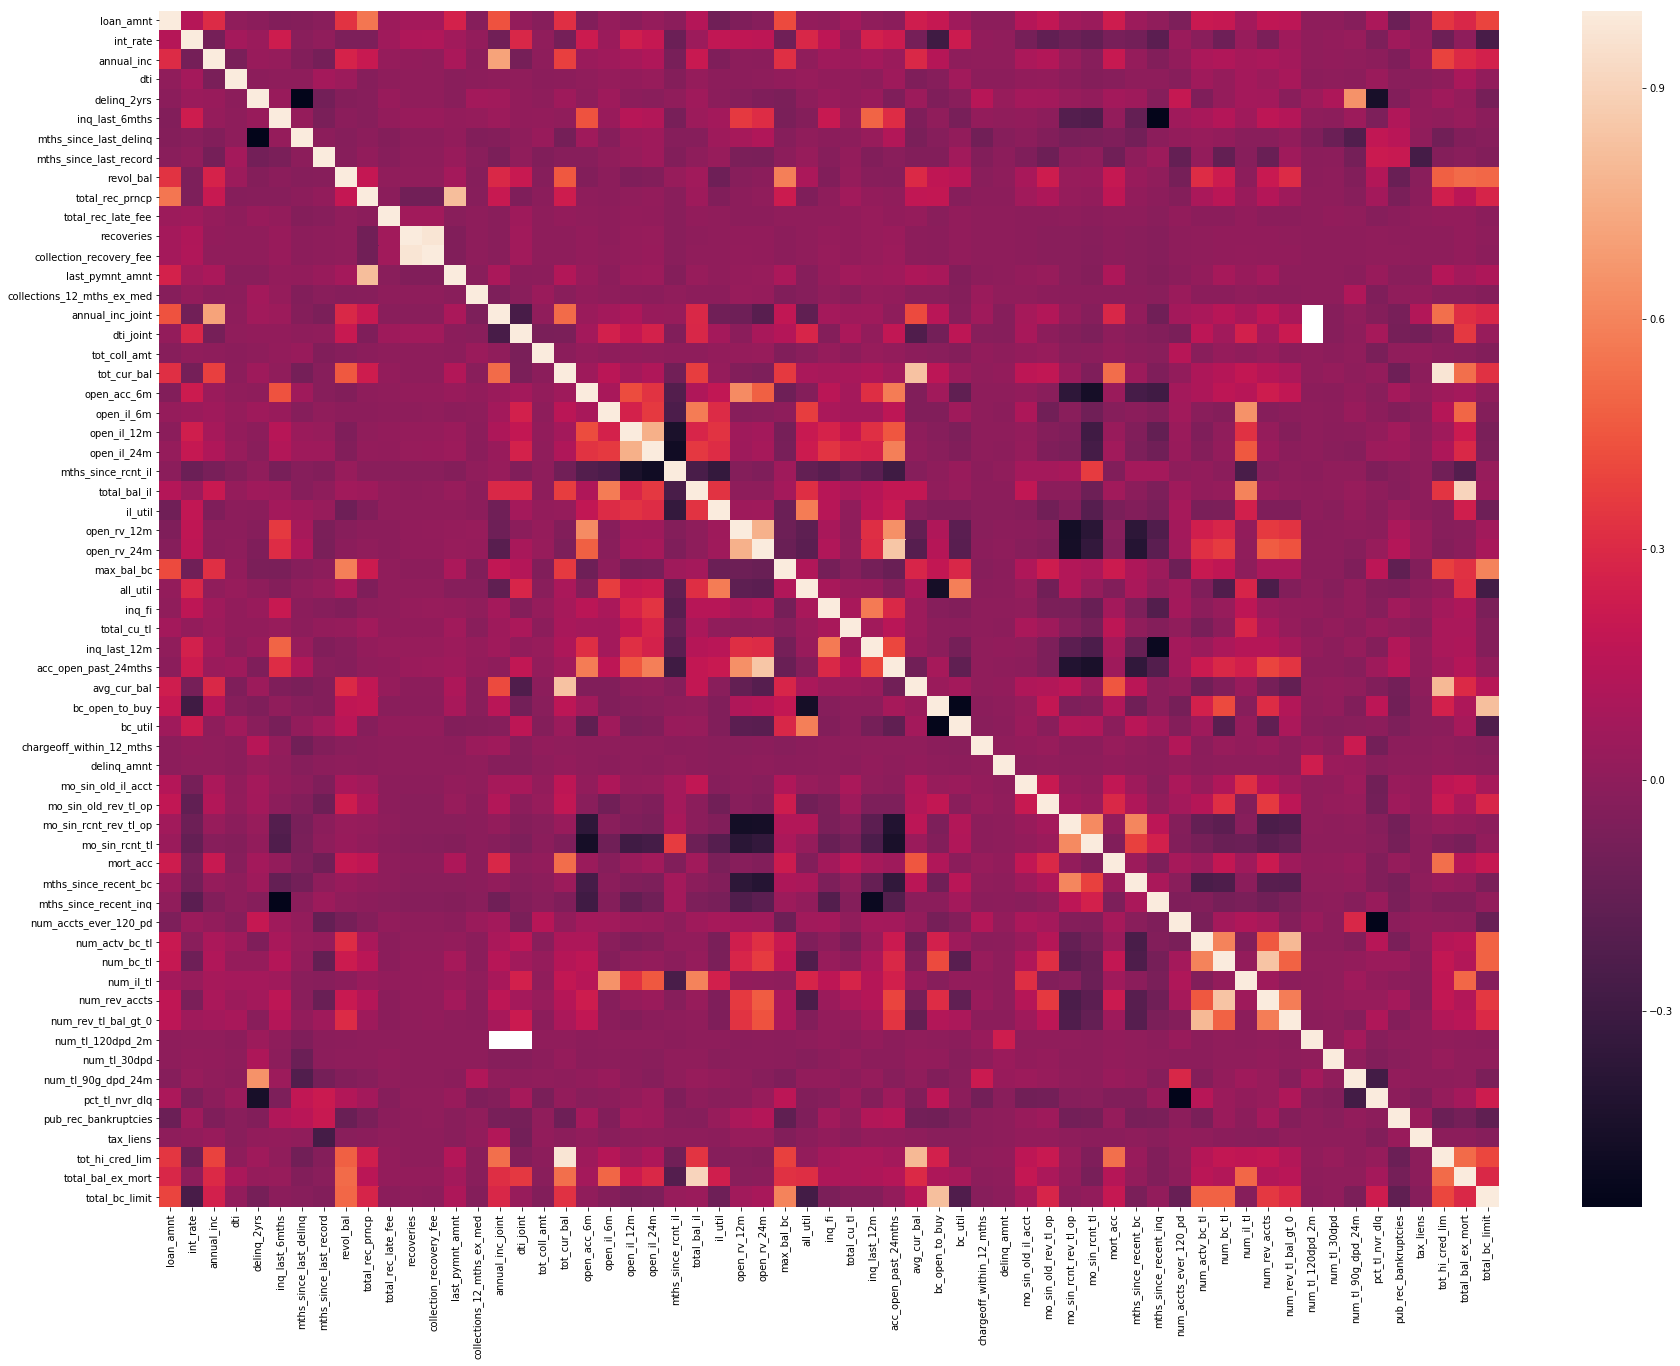

In [13]:
plt.figure(figsize=(30,22))
sns.heatmap(y2015.corr())

In [16]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

term
2
grade
7
emp_length
11
home_ownership
4
verification_status
3
loan_status
7
pymnt_plan
1
purpose
14
initial_list_status
2
next_pymnt_d
4
application_type
2
verification_status_joint
3


In [17]:
pd.get_dummies(y2015)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,total_rec_prncp,...,initial_list_status_w,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,16000.0,14.85,48000.0,33.18,0.0,0.0,33.0,2.0,19108.0,2331.12,...,1,0,1,0,0,1,0,0,0,0
1,9600.0,7.49,60000.0,22.44,0.0,0.0,NaN,NaN,7722.0,2964.31,...,1,0,1,0,0,1,0,0,0,0
2,25000.0,7.49,109000.0,26.02,0.0,1.0,NaN,NaN,20862.0,25000.00,...,1,0,0,0,0,1,0,0,0,0
3,28000.0,6.49,92000.0,21.60,0.0,0.0,42.0,NaN,51507.0,8736.23,...,1,0,1,0,0,1,0,0,0,0
4,8650.0,19.89,55000.0,25.49,0.0,4.0,NaN,30.0,9568.0,8650.00,...,1,0,0,0,0,1,0,0,0,0
5,23000.0,8.49,64000.0,18.28,0.0,0.0,29.0,NaN,24940.0,3856.31,...,1,0,1,0,0,1,0,0,0,0
6,29900.0,12.88,65000.0,21.77,0.0,0.0,NaN,NaN,31682.0,4553.34,...,1,1,0,0,0,1,0,0,0,0
7,18000.0,11.99,112000.0,8.68,0.0,0.0,NaN,NaN,10711.0,18000.00,...,1,0,0,0,0,1,0,0,0,0
8,35000.0,14.85,110000.0,17.06,0.0,0.0,NaN,NaN,7802.0,5099.11,...,1,0,1,0,0,1,0,0,0,0
9,10400.0,22.45,104433.0,25.37,1.0,3.0,12.0,NaN,21929.0,10400.00,...,1,0,0,0,0,1,0,0,0,0


In [18]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, y, cv=10)

array([0.95749329, 0.9585619 , 0.95860939, 0.95929805, 0.95934457,
       0.95839468, 0.95858368, 0.95798998, 0.95815423, 0.95827198])

In [19]:
X.corr()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,revol_bal,total_rec_prncp,total_rec_late_fee,recoveries,...,initial_list_status_w,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
loan_amnt,1.000000,0.140572,0.305734,0.006103,-0.010424,-0.039040,0.334656,0.556266,0.051888,0.077870,...,0.071209,0.017513,0.006620,-0.000223,0.005244,-0.016880,0.016880,0.008359,0.007089,0.014350
int_rate,0.140572,1.000000,-0.090399,0.077932,0.043710,0.231139,-0.057412,-0.057379,0.063685,0.119825,...,-0.155929,-0.093868,-0.005472,0.001067,0.000938,-0.020755,0.020755,0.008172,0.011635,0.018622
annual_inc,0.305734,-0.090399,1.000000,-0.068237,0.037910,0.022990,0.270174,0.209988,0.025224,0.011110,...,0.037991,0.000019,-0.001065,0.000688,0.000710,0.008627,-0.008627,-0.003188,-0.005930,-0.007350
dti,0.006103,0.077932,-0.068237,1.000000,-0.005868,0.003277,0.048135,-0.029406,-0.001150,0.009553,...,-0.009725,0.007098,0.003721,0.000235,0.000349,-0.077534,0.077534,0.086092,0.011906,0.016317
delinq_2yrs,-0.010424,0.043710,0.037910,-0.005868,1.000000,0.036139,-0.035801,-0.019934,0.036797,0.004777,...,-0.013511,0.004636,0.005532,0.006067,-0.001715,-0.000550,0.000550,0.001747,0.001023,-0.001930
inq_last_6mths,-0.039040,0.231139,0.022990,0.003277,0.036139,1.000000,-0.012303,-0.021096,0.019330,0.039129,...,-0.065025,-0.063385,-0.003715,0.006086,-0.002381,-0.001600,0.001600,0.000415,0.000925,0.001699
revol_bal,0.334656,-0.057412,0.270174,0.048135,-0.035801,-0.012303,1.000000,0.197859,0.009657,0.008373,...,0.037965,0.024749,0.006110,-0.000166,0.001130,0.002936,-0.002936,-0.002622,-0.001244,-0.000970
total_rec_prncp,0.556266,-0.057379,0.209988,-0.029406,-0.019934,-0.021096,0.197859,1.000000,-0.008028,-0.100933,...,-0.018822,-0.341800,-0.105251,0.001668,0.001425,0.003358,-0.003358,-0.005189,-0.001354,0.001701
total_rec_late_fee,0.051888,0.063685,0.025224,-0.001150,0.036797,0.019330,0.009657,-0.008028,1.000000,0.065903,...,-0.016331,-0.027733,-0.002811,-0.000163,-0.000609,-0.005313,0.005313,0.005494,0.000555,0.001803
recoveries,0.077870,0.119825,0.011110,0.009553,0.004777,0.039129,0.008373,-0.100933,0.065903,1.000000,...,-0.027798,-0.162650,-0.041622,-0.000195,-0.000728,0.002087,-0.002087,-0.001767,-0.001294,-0.000567


In [59]:
# from sklearn.decomposition import PCA
# from itertools import combinations
# from sklearn.preprocessing import PolynomialFeatures

# def add_interactions(X):
#     # Get feature names
#     combos = list(combinations(list(X.columns), 2))
#     colnames = list(X.columns) + ['_'.join(X) for X in combos]
    
#     # Find interactions
#     poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#     X = poly.fit_transform(X)
#     X = pd.DataFrame(X)
#     X.columns = colnames
    
#     # Remove interaction terms with all 0 values            
#     noint_indicies = [i for i, X in enumerate(list((X == 0).all())) if X]
#     X = X.drop(X.columns[noint_indicies], axis=1)
    
#     return X

# X = add_interactions(X)
# print(X.head(5))